In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u

import scopesim_templates as sim_tp
import scopesim as sim

# Setup

In [2]:
# Gijs's local computer
# sim.download_packages(["Armazones", "ELT", "MAORY", "MICADO"])

# Kieran's computer -> redirects ScopeSim to folder containing IRDB 
# MicadoWise could do this too and clone daily from github to save running time
sim.rc.__config__["!SIM.file.local_packages_path"] = "F:\Work\irdb"

# Make the MICADO optical train

In [3]:
cmds = sim.UserCommands(use_instrument="MICADO", set_modes=["SCAO", "IMG_1.5mas"])

# EXPTIME = 3600 = ndit * dit
cmds["!DET.dit"] = 30
cmds["!DET.ndit"] = 120

micado = sim.OpticalTrain(cmds)

In [4]:
# Check the status of the effect objects -> mainly to see which detector (full or windowed) is selected
# micado.effects

# Create the on-sky scene with 3+1 stars

In [5]:
fixed_stars = sim_tp.stellar.stars(filter_name="H", 
                                   amplitudes=[20, 21, 22]*u.mag,       # [u.mag, u.ABmag, u.Jy]
                                   spec_types=["A0V", "A0V", "A0V"],    
                                   x=[0, 0.5, 0.5], y=[0.5, 0, 0.5])    # [u.arcsec]
moving_star = sim_tp.stellar.star(filter_name="H", 
                                  amplitude=23*u.mag, 
                                  spec_type="A0V", 
                                  x=-0.0, y=0.0)

['A0V']
['A0V']


# Move one of the stars around

In [6]:
moving_star.shift(dx=0.1, dy=-0.1)    # dx, dy added to latest position, NOT original positions from previous cell

# Observe the stars

In [7]:
scene = fixed_stars + moving_star
micado.observe(scene)
hdu = micado.readout()[0]

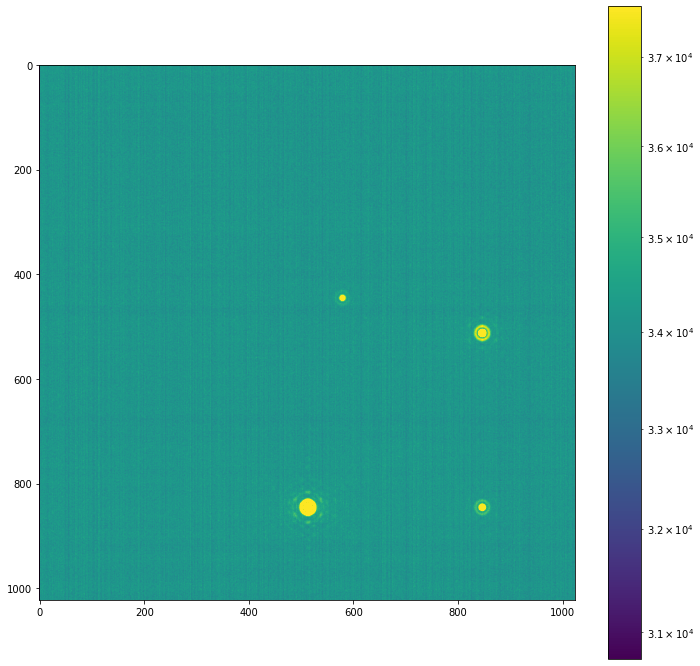

In [8]:
photon_map = micado.image_planes[0].data
readout_image = hdu[1].data

im = readout_image

plt.figure(figsize=(12,12))
norm = LogNorm(vmax=1.1 * np.median(im), vmin=0.9 * np.median(im))
plt.imshow(im, norm=norm)
plt.colorbar()

# Use the whole MICADO detector array

In [11]:
# micado.effects    # list the names of all the MICADO effects
# micado["full_detector_array"].include = True
# micado["detector_window"].include = False

# scene = fixed_stars + moving_star

# micado.observe(scene) 
# hdu_full = micado.readout()[0]

# Write out FITS to disk

In [9]:
# hdu.writeto("test_4_stars_windowed.fits")
# hdu_full.writeto("test_4_stars_all_detector.fits")